# Emotion Analysis

# 1)-Import key modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

# 2) Loading data

In [2]:
df = pd.read_csv('tweets.csv')
df.shape

(9093, 3)

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Selects the first column from our data frame
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [5]:
# Selects the third column from our data frame
text = df['tweet_text']

print(len(text))

9093


In [6]:
target.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

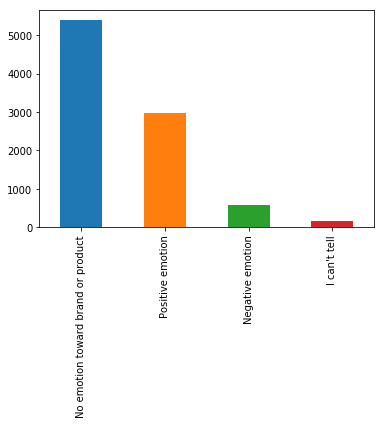

In [7]:
target.value_counts().plot(kind='bar')

# 3)- Explore data

In [8]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [9]:
summary_missing(df)

No. of fields:  9093
No. of missing fields:  1


,No. of mising Value,%age of missing Value
emotion_in_tweet_is_directed_at,5802,63.8


### Remove missing values

In [10]:
target = target[pd.notnull(text)]
text = text[pd.notnull(text)]

# 4)- Bag of words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
# print the number of words in the vocabulary
print(len(count_vect.vocabulary_))

9706


In [13]:
count_vect.vocabulary_

{'wesley83': 9373,
 'have': 3981,
 '3g': 168,
 'iphone': 4573,
 'after': 430,
 'hrs': 4210,
 'tweeting': 8920,
 'at': 774,
 'rise_austin': 7232,
 'it': 4610,
 'was': 9303,
 'dead': 2291,
 'need': 5766,
 'to': 8702,
 'upgrade': 9062,
 'plugin': 6478,
 'stations': 8076,
 'sxsw': 8323,
 'jessedee': 4678,
 'know': 4847,
 'about': 313,
 'fludapp': 3356,
 'awesome': 876,
 'ipad': 4560,
 'app': 644,
 'that': 8560,
 'you': 9625,
 'll': 5094,
 'likely': 5042,
 'appreciate': 677,
 'for': 3401,
 'its': 4619,
 'design': 2386,
 'also': 527,
 'they': 8602,
 're': 6913,
 'giving': 3685,
 'free': 3454,
 'ts': 8870,
 'swonderlin': 8307,
 'can': 1457,
 'not': 5879,
 'wait': 9257,
 'should': 7636,
 'sale': 7332,
 'them': 8581,
 'down': 2642,
 'hope': 4167,
 'this': 8616,
 'year': 9603,
 'festival': 3235,
 'isn': 4602,
 'as': 752,
 'crashy': 2114,
 'sxtxstate': 8372,
 'great': 3803,
 'stuff': 8186,
 'on': 6007,
 'fri': 3465,
 'marissa': 5308,
 'mayer': 5367,
 'google': 3741,
 'tim': 8664,
 'reilly': 7043,

In [14]:
# turns the text into a sparse matrix i.e less zeros 
counts = count_vect.transform(text)

In [15]:
counts

<9092x9706 sparse matrix of type '<class 'numpy.int64'>'
	with 147763 stored elements in Compressed Sparse Row format>

# 5)- Model

In [16]:
# Train with this data with a Naive Bayes classifier:
nb = MultinomialNB()
nb.fit(counts, target)
print(nb.predict(count_vect.transform(['i hate my iphone'])))

['Negative emotion']
